In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import truncnorm
import pandas as pd
import os

In [4]:
"""
columns:
men mean
women mean
men CI width
women CI width
men stddev
women stddev
"""

csvns_arr = pd.read_excel(os.path.join("..", "..", "smoking_mortality", "csvns_stddevs.xlsx")).to_numpy()[:,1:]
fsvcs_arr = pd.read_excel(os.path.join("..", "..", "smoking_mortality", "fsvcs_stddevs.xlsx")).to_numpy()[:,1:]

print(csvns_arr)

[[3.7 2.7 1.3 0.9 0.3316326530612245 0.22959183673469388]
 [3.4 3.0 0.6 0.5 0.15306122448979592 0.12755102040816327]
 [3.5 3.1 0.4 0.4 0.10204081632653061 0.10204081632653061]
 [3.3 3.1 0.3 0.3 0.07653061224489796 0.07653061224489796]
 [2.6 2.7 0.3 0.3 0.07653061224489796 0.07653061224489796]
 [2.4 2.3 0.5 0.4 0.12755102040816327 0.10204081632653061]
 [1.8 1.9 0.8 0.6 0.20408163265306123 0.15306122448979592]]


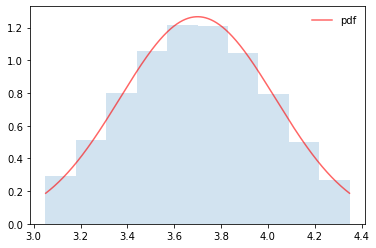

some random samples: [3.75621355 3.78418235 4.13661523 3.55756404 3.91981318 3.74579459
 4.00843992 3.25979421 3.64354292 3.29810563]


In [31]:
# look at current smoker vs nonsmoker mortality for men age 55-60
mean = csvns_arr[0,0]
CI_width = csvns_arr[0,2]
stddev = csvns_arr[0,4]

a,b = -1.96, 1.96 # magic number for 95% confidence interval

my_dist = truncnorm(a,b)
pdf = lambda x: my_dist.pdf((x - mean) / stddev) / stddev
cdf = lambda x: my_dist.cdf((x - mean) / stddev)

# check pdf
x_unit = np.linspace(-1.96, 1.96, 1000)
x_unit = x_unit[1:-1]
x = np.linspace(mean - CI_width / 2, mean + CI_width / 2, 1000)
x = x[1:-1]

fig, ax = plt.subplots(1,1)
ax.plot(x, pdf(x), 'r-', alpha=0.6, label="pdf")
# ax.plot(x_unit, my_dist.pdf(x_unit), 'b-', label='unit pdf')
# ax.plot(x, cdf(x), 'r-', alpha=0.6, label="cdf")

# generate random samples
samples = my_dist.rvs(size=10000) * stddev + mean
vals, bins, _ = ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2,)
ax.legend(loc='best', frameon=False)
plt.show()

print("some random samples:", samples[:10])

